<a href="https://colab.research.google.com/github/SahilMalavi/CODSOFT/blob/Iris-flower-classification/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris=pd.read_csv("Iris.csv")

In [130]:
#renaming columns name
iris=iris.rename(columns={'SepalLengthCm':'sepal.len','SepalWidthCm':'sepal.wid','PetalLengthCm':'petal.len','PetalWidthCm':'petal.wid','Species':'species'})
iris.head()


,Id,sepal.len,sepal.wid,petal.len,petal.wid,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

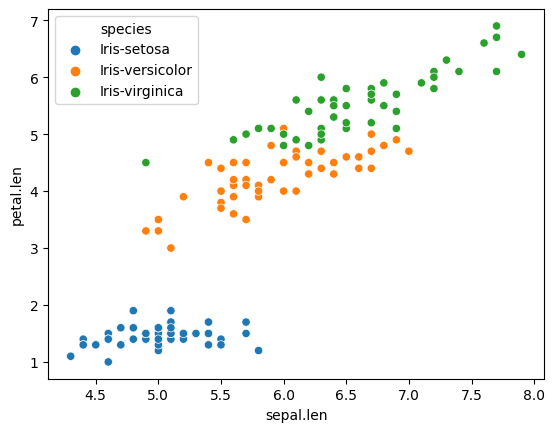

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='sepal.len',y='petal.len',data=iris,hue="species")
plt.show()

**Converting categorical varibales into numbers**

In [131]:
iris['species']=iris['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [128]:
iris['species'].value_counts()

Series([], Name: species, dtype: int64)

In [132]:
x=iris.drop(['species','Id'],axis=1)
y=iris['species']
x

,sepal.len,sepal.wid,petal.len,petal.wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [133]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [134]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [135]:
model.score(x,y)

0.9733333333333334

In [136]:
pred=model.predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [141]:
iris['pred']=pred
iris['species']=iris['pred'].map({0:'Setosa',1:'versicolor',2:'virginica'})


In [147]:
iris['species']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [143]:
iris['species'].value_counts()

virginica     52
Setosa        50
versicolor    48
Name: species, dtype: int64

In [112]:
from sklearn import metrics
print(metrics.classification_report(y, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [145]:
print(metrics.confusion_matrix(y, pred))


[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
